===========iteration:0===========
SGD:2.39705209109717
Momentum:2.360998834561455
AdaGrad:1.9740675718817606
Adam:2.2398172794957487
===========iteration:400===========
SGD:0.5081525485533205
Momentum:0.18872069688180435
AdaGrad:0.10563361035252736
Adam:0.13196579088129876
===========iteration:800===========
SGD:0.3840006921109181
Momentum:0.11800276425503323
AdaGrad:0.056798936218834646
Adam:0.11873849652721245
===========iteration:1200===========
SGD:0.24611138285685003
Momentum:0.11525818102310284
AdaGrad:0.06903405150753664
Adam:0.08686936636008989
===========iteration:1600===========
SGD:0.19141184573956999
Momentum:0.06313216158170702
AdaGrad:0.0258941960623078
Adam:0.06558377513032582
===========iteration:2000===========
SGD:0.17012507263221058
Momentum:0.035150537783736266
AdaGrad:0.015488113745651372
Adam:0.013776767174398335
===========iteration:2400===========
SGD:0.12263931725495208
Momentum:0.053816577950711424
AdaGrad:0.02153626321973895
Adam:0.02857963784430248
=========

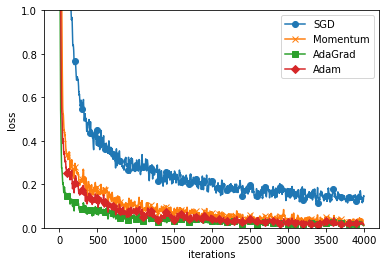

In [1]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 4000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 400 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()